In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

In [330]:
df = pd.read_csv('auto-mpg.csv')

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [332]:
df.shape

(398, 9)

In [333]:
# Removing the ? sign with NaN
df = df.replace('?',np.NaN)

In [334]:
# Removing all NaN contained rows
df = df.dropna()

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null object
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [336]:
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
54,35.0,4,72.0,69,1613,18.0,71,3,datsun 1200
363,22.4,6,231.0,110,3415,15.8,81,1,buick century
139,14.0,8,302.0,140,4638,16.0,74,1,ford gran torino (sw)
122,24.0,4,121.0,110,2660,14.0,73,2,saab 99le
273,23.9,4,119.0,97,2405,14.9,78,3,datsun 200-sx


In [337]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [338]:
# Lets remove unnecessary columns

df.drop(['car name', 'origin'], axis = 1, inplace = True)

In [339]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [340]:
df['model year'] = '19' + df['model year'].astype(str)

In [341]:
import datetime
df['age'] = datetime.datetime.now().year - pd.to_numeric(df['model year'])

In [342]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,age
0,18.0,8,307.0,130,3504,12.0,1970,49
1,15.0,8,350.0,165,3693,11.5,1970,49
2,18.0,8,318.0,150,3436,11.0,1970,49
3,16.0,8,304.0,150,3433,12.0,1970,49
4,17.0,8,302.0,140,3449,10.5,1970,49


In [343]:
df.drop(['model year'], axis = 1, inplace = True)

In [344]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,49
1,15.0,8,350.0,165,3693,11.5,49
2,18.0,8,318.0,150,3436,11.0,49
3,16.0,8,304.0,150,3433,12.0,49
4,17.0,8,302.0,140,3449,10.5,49


In [345]:
from sklearn import preprocessing

In [346]:
df[['displacement']] = preprocessing.scale(df[['displacement']].astype('float64'))

In [347]:
df[['weight']] = preprocessing.scale(df[['weight']].astype('float64'))

In [348]:
df[['horsepower']] = preprocessing.scale(df[['horsepower']].astype('float64'))

In [349]:
df[['acceleration']] = preprocessing.scale(df[['acceleration']].astype('float64'))

In [350]:
df[['age']] = preprocessing.scale(df[['age']].astype('float64'))

In [351]:
df[['cylinders']] = preprocessing.scale(df[['cylinders']].astype('float64'))

In [352]:
corr_img = df.corr()

In [353]:
import seaborn as sns

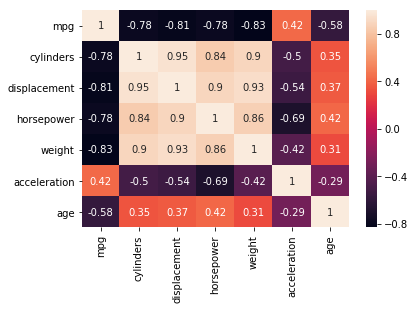

In [354]:
sns.heatmap(corr_img, annot = True)

In [355]:
result_dict = {}

In [356]:
def build_model(regression_fn,
               name_of_y_col,
               name_of_x_cols,
               df,
               test_frac=0.2,
               preprocess_fn = None,
               show_plot_y = False,
               show_plot_scatter = False):
    
    X = df[name_of_x_cols]
    y = df[name_of_y_col]
    
    if preprocess_fn is not None:
        X = preprocess_fn(X)
        
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_frac)
    
    model = regression_fn(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print("Training score : ", model.score(X_train, y_train))
    print("Test score:", r2_score(y_test, y_pred))
    
    if show_plot_y == True:
        fig, ax = plt.subplots(figsize = (12,8))
        
        plt.plot(y_pred, label = 'predicted')
        plt.plot(y_test.values, label = 'Actual')
        
        plt.ylabel(name_of_y_col)
        
        plt.legend()
        plt.show()
        
    if show_plot_scatter == True:
        fig, ax = plt.subplots(figsize=(12,8))
        
        plt.scatter(X_test, y_test)
        plt.plot(X_test, y_pred, 'r')
        
        plt.legend(['predicted line', 'observed line'])
        plt.show()
        
    return {
        'training_score' : model.score(X_train, y_train),
        'test_score' : r2_score(y_test, y_pred)
            }
        

In [357]:
def compare_results():
    for key in result_dict:
        print('Regression:', key)
        print('Training score:', result_dict[key]['training_score'])
        print('Test score:', result_dict[key]['test_score'])
        print()

In [358]:
#We will start with simple linear regression

def linear_reg(X_train, y_train):
    model = LinearRegression(normalize=True)
    model.fit(X_train, y_train)
    
    return model

Training score :  0.6969062845300482
Test score: 0.6601903477462103


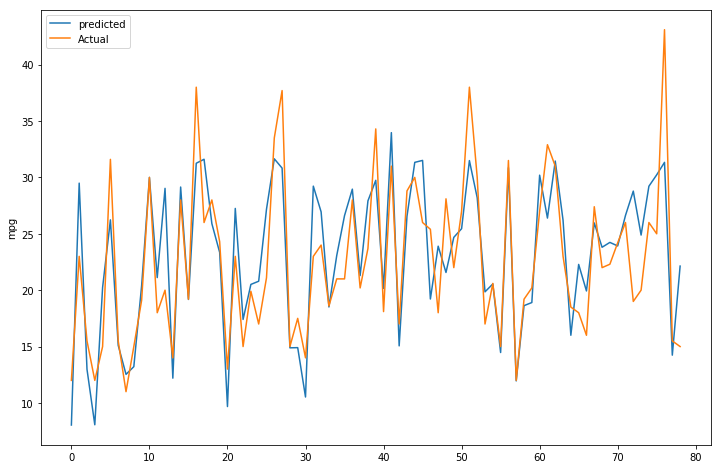

In [359]:
result_dict['mpg ~ single_linear'] = build_model(linear_reg,
                                                'mpg',
                                                ['weight'],
                                                df,
                                                show_plot_y=True)

In [360]:
col = ['cylinders','displacement','horsepower','weight','acceleration']

Training score :  0.724501643113344
Test score: 0.6023305068748797


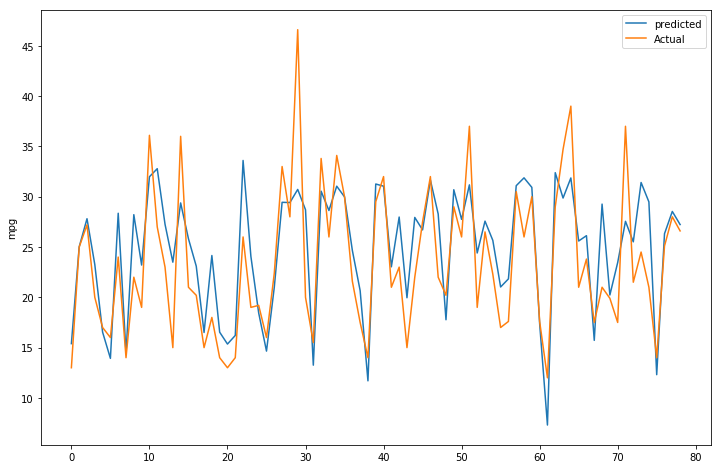

In [361]:
#Now, we will do kitchen sink linear regression- i.e - Multi linear regression where we will put all features at go.

result_dict['mpg- kitchen_sink_linear'] = build_model(linear_reg,
                                                     'mpg',
                                                      col,
                                                     df,
                                                     show_plot_y=True)

In [362]:
##predictors = X
##coef = pd.Series(model.coef_,predictors).sort_values()

##print(coef)

In [363]:
compare_results()

Regression: mpg ~ single_linear
Training score: 0.6969062845300482
Test score: 0.6601903477462103

Regression: mpg- kitchen_sink_linear
Training score: 0.724501643113344
Test score: 0.6023305068748797



In [364]:
#Implementing Lasso Regression

def Lasso_Reg(X_train, y_train, alpha = 0.5):
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    
    return model

Training score :  0.7131184967251304
Test score: 0.6506980335279179


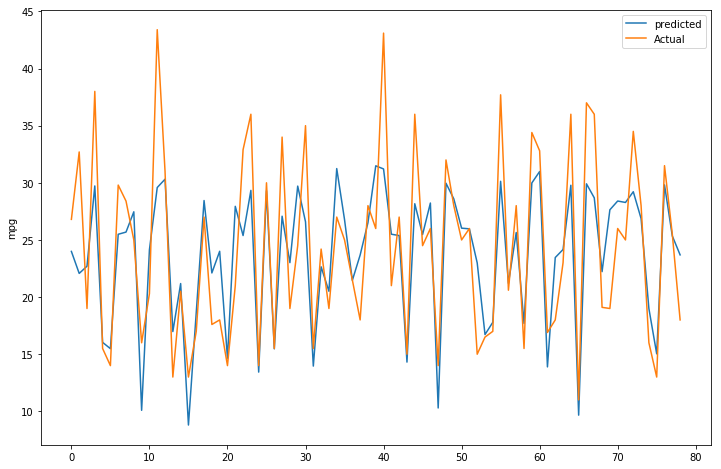

In [365]:
result_dict['mpg ~ kitchen_sink_lasso Regression'] = build_model(Lasso_Reg,
                                                     'mpg',
                                                     col,
                                                     df,
                                                     show_plot_y=True)

In [366]:
compare_results()

Regression: mpg ~ single_linear
Training score: 0.6969062845300482
Test score: 0.6601903477462103

Regression: mpg- kitchen_sink_linear
Training score: 0.724501643113344
Test score: 0.6023305068748797

Regression: mpg ~ kitchen_sink_lasso Regression
Training score: 0.7131184967251304
Test score: 0.6506980335279179



In [367]:
def ridge_reg(X_train, y_train, alpha = 3):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    return model

Training score :  0.7207090438120896
Test score: 0.6375563884431568


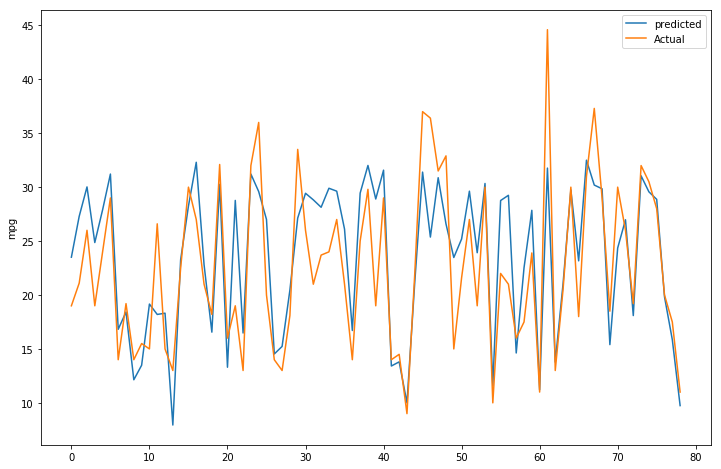

In [368]:
result_dict['mpg-kitchen sink ridge Regression'] = build_model(ridge_reg,
                                                         'mpg',
                                                         col,
                                                         df,
                                                         show_plot_y=True)

In [369]:
compare_results()

Regression: mpg ~ single_linear
Training score: 0.6969062845300482
Test score: 0.6601903477462103

Regression: mpg- kitchen_sink_linear
Training score: 0.724501643113344
Test score: 0.6023305068748797

Regression: mpg ~ kitchen_sink_lasso Regression
Training score: 0.7131184967251304
Test score: 0.6506980335279179

Regression: mpg-kitchen sink ridge Regression
Training score: 0.7207090438120896
Test score: 0.6375563884431568



In [370]:
def elastic_net_reg(X_train, y_train, alpha=1,l1_ratio = 0.5,normalize=False, max_iter=1000,warm_start = True,
                    equivalent_to= "Elastic Net"):
    
    print("Equivalent to:", equivalent_to)
    
    model = ElasticNet(alpha=alpha,l1_ratio = l1_ratio,
                      normalize=normalize, max_iter = max_iter, warm_start = warm_start)
    model.fit(X_train,y_train)
    
    return model

Equivalent to: Elastic Net
Training score :  0.6568826350542495
Test score: 0.6451332254025367


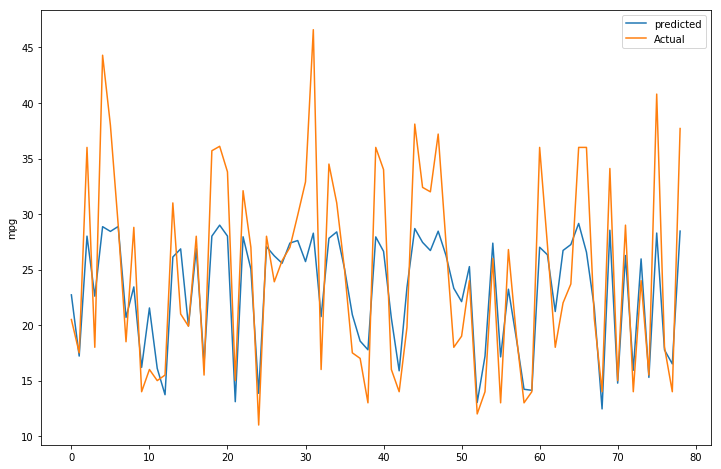

In [371]:
result_dict['mpg- Kitchen sink elastic net'] = build_model(elastic_net_reg,
                                                          'mpg',
                                                          col,
                                                          df,
                                                          show_plot_y = True)

In [372]:
compare_results()

Regression: mpg ~ single_linear
Training score: 0.6969062845300482
Test score: 0.6601903477462103

Regression: mpg- kitchen_sink_linear
Training score: 0.724501643113344
Test score: 0.6023305068748797

Regression: mpg ~ kitchen_sink_lasso Regression
Training score: 0.7131184967251304
Test score: 0.6506980335279179

Regression: mpg-kitchen sink ridge Regression
Training score: 0.7207090438120896
Test score: 0.6375563884431568

Regression: mpg- Kitchen sink elastic net
Training score: 0.6568826350542495
Test score: 0.6451332254025367



In [373]:
def svr_reg(X_train, y_train, kernel = 'linear', epsilon=0.05, c=0.3):
    model = SVR(kernel=kernel, epsilon = epsilon)
    model.fit(X_train, y_train)
    
    return model

Training score :  0.6887666485638517
Test score: 0.7091366416243587


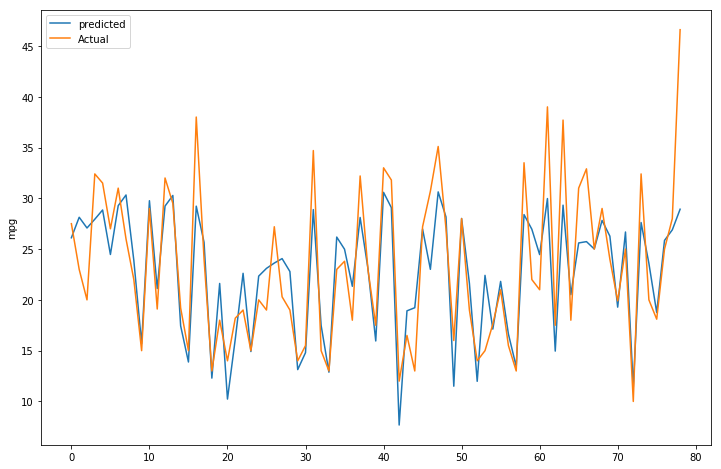

In [374]:
result_dict['mpg- kitchen_sink_svr'] = build_model(svr_reg,
                                                  'mpg',
                                                  col,
                                                   df,
                                                   show_plot_y = True)

In [375]:
compare_results()

Regression: mpg ~ single_linear
Training score: 0.6969062845300482
Test score: 0.6601903477462103

Regression: mpg- kitchen_sink_linear
Training score: 0.724501643113344
Test score: 0.6023305068748797

Regression: mpg ~ kitchen_sink_lasso Regression
Training score: 0.7131184967251304
Test score: 0.6506980335279179

Regression: mpg-kitchen sink ridge Regression
Training score: 0.7207090438120896
Test score: 0.6375563884431568

Regression: mpg- Kitchen sink elastic net
Training score: 0.6568826350542495
Test score: 0.6451332254025367

Regression: mpg- kitchen_sink_svr
Training score: 0.6887666485638517
Test score: 0.7091366416243587



In [380]:
def kneighbors_reg(X_train, y_train, n_neighbors=5):
    model = KNeighborsRegressor(n_neighbors = n_neighbors)
    model.fit(X_train, y_train)
    
    return model

Training score :  0.8134240471042589
Test score: 0.7861881266305966


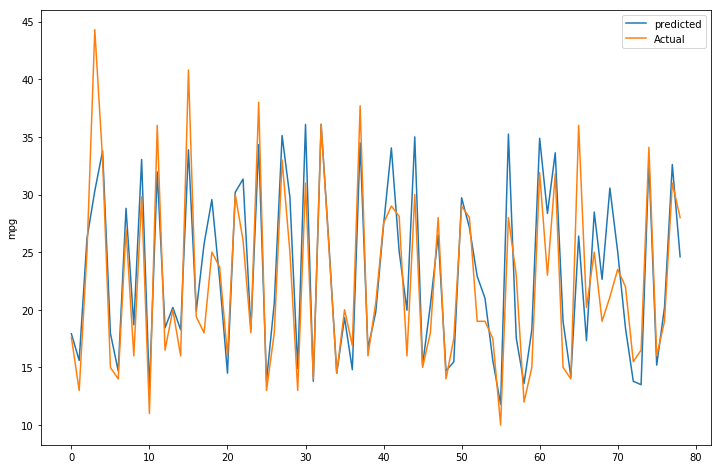

In [383]:
result_dict['mpg- kitchen_sink_Kneighbors'] = build_model(kneighbors_reg,
                                                        'mpg',
                                                        col,
                                                        df,
                                                        show_plot_y=True)

In [384]:
compare_results()

Regression: mpg ~ single_linear
Training score: 0.6969062845300482
Test score: 0.6601903477462103

Regression: mpg- kitchen_sink_linear
Training score: 0.724501643113344
Test score: 0.6023305068748797

Regression: mpg ~ kitchen_sink_lasso Regression
Training score: 0.7131184967251304
Test score: 0.6506980335279179

Regression: mpg-kitchen sink ridge Regression
Training score: 0.7207090438120896
Test score: 0.6375563884431568

Regression: mpg- Kitchen sink elastic net
Training score: 0.6568826350542495
Test score: 0.6451332254025367

Regression: mpg- kitchen_sink_svr
Training score: 0.6887666485638517
Test score: 0.7091366416243587

Regression: mpg- kitchen_sink_Kneighbors
Training score: 0.8134240471042589
Test score: 0.7861881266305966



In [387]:
def sgd_req(X_train, y_train, max_iter = 10000, tol = 3):
    model = SGDRegressor(max_iter=max_iter,tol=tol)
    model.fit(X_train, y_train)
    
    return model

Training score :  0.6860919167235624
Test score: 0.7034207226606284


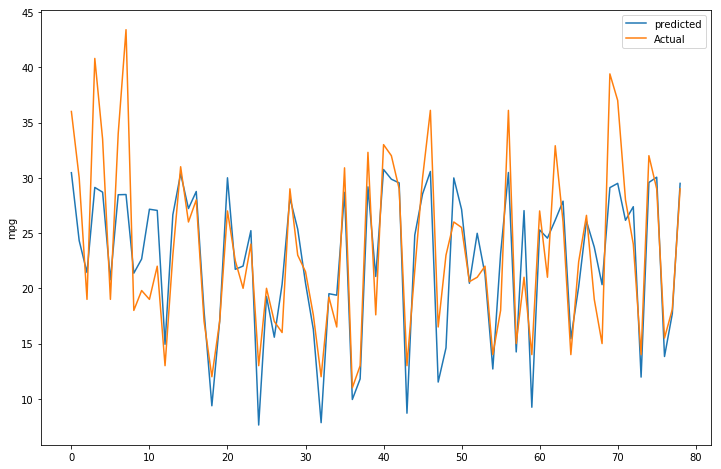

In [396]:
result_dict['mpg- kitchen_sink_sgd'] = build_model(sgd_req,
                                                  'mpg',
                                                  col,
                                                  df,
                                                  show_plot_y=True)

In [398]:
compare_results()

Regression: mpg ~ single_linear
Training score: 0.6969062845300482
Test score: 0.6601903477462103

Regression: mpg- kitchen_sink_linear
Training score: 0.724501643113344
Test score: 0.6023305068748797

Regression: mpg ~ kitchen_sink_lasso Regression
Training score: 0.7131184967251304
Test score: 0.6506980335279179

Regression: mpg-kitchen sink ridge Regression
Training score: 0.7207090438120896
Test score: 0.6375563884431568

Regression: mpg- Kitchen sink elastic net
Training score: 0.6568826350542495
Test score: 0.6451332254025367

Regression: mpg- kitchen_sink_svr
Training score: 0.6887666485638517
Test score: 0.7091366416243587

Regression: mpg- kitchen_sink_Kneighbors
Training score: 0.8134240471042589
Test score: 0.7861881266305966

Regression: mpg- kitchen_sink_sgd
Training score: 0.6860919167235624
Test score: 0.7034207226606284



In [399]:
def decision_tree_reg(X_train, y_train, max_depth = 2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    return model

Training score :  0.7372518114171235
Test score: 0.7088881924722983


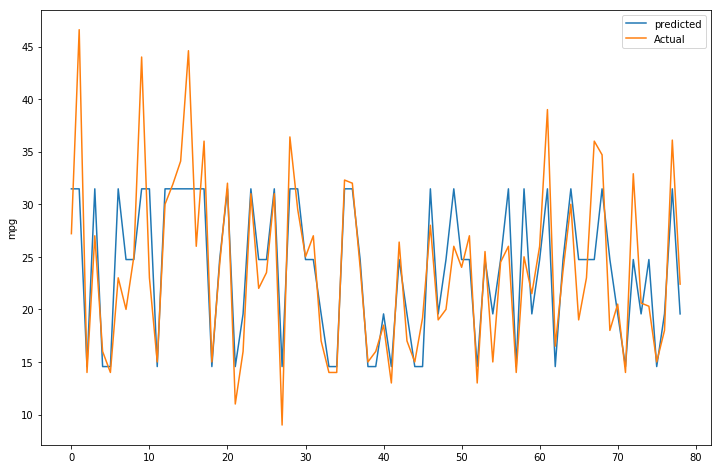

In [413]:
result_dict['mpg- kitchen_sink_decision_tree'] = build_model(decision_tree_reg,
                                                            'mpg',
                                                            col,
                                                            df,
                                                            show_plot_y=True)

In [418]:
# Implementing Least Angle Regression

def lars_reg(X_train, y_train, n_nonzero_coefs=4):
    model = Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(X_train, y_train)
    
    return model

Training score :  0.6913589583502825
Test score: 0.7549342261294664


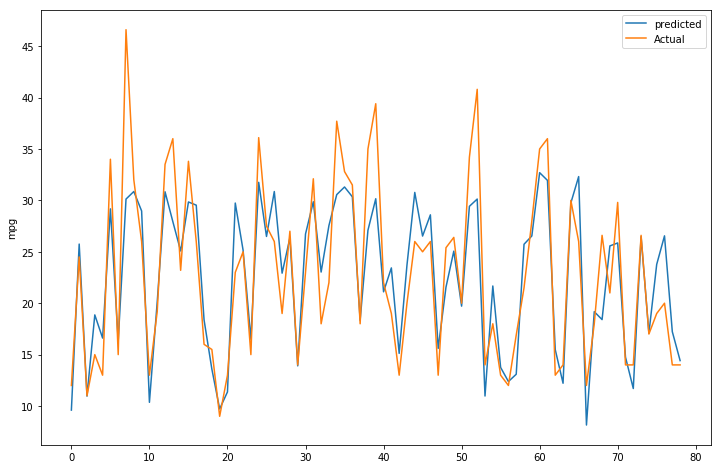

In [421]:
result_dict['mpg-kitchen_sink_lars'] = build_model(lars_reg,
                                                  'mpg',
                                                  col,
                                                  df,
                                                  show_plot_y=True)

#### Hyper parameter Turnning

In [433]:
from sklearn.model_selection import GridSearchCV

In [422]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,1.483947,1.077290,0.664133,0.620540,-1.285258,1.625315
1,15.0,1.483947,1.488732,1.574594,0.843334,-1.466724,1.625315
2,18.0,1.483947,1.182542,1.184397,0.540382,-1.648189,1.625315
3,16.0,1.483947,1.048584,1.184397,0.536845,-1.285258,1.625315
4,17.0,1.483947,1.029447,0.924265,0.555706,-1.829655,1.625315


In [430]:
X = df.drop(['mpg', 'age'], axis = 1)

Y = df['mpg']

In [431]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [434]:
parameters = {'alpha': [0.2,0.4,0.6,0.7,0.8,1.0]}

grid_search = GridSearchCV(Lasso(), parameters, cv = 3, return_train_score = True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'alpha': 0.2}

In [435]:
for i in range(len(parameters['alpha'])):
    print('parameters: ', grid_search.cv_results_['params'][i])
    
    print('Mean test score:', grid_search.cv_results_['mean_test_score'][i])
    
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])

parameters:  {'alpha': 0.2}
Mean test score: 0.6934556334085145
Rank:  1
parameters:  {'alpha': 0.4}
Mean test score: 0.6923716882272002
Rank:  2
parameters:  {'alpha': 0.6}
Mean test score: 0.6894272123571298
Rank:  3
parameters:  {'alpha': 0.7}
Mean test score: 0.6871382780539087
Rank:  4
parameters:  {'alpha': 0.8}
Mean test score: 0.6844682052480737
Rank:  5
parameters:  {'alpha': 1.0}
Mean test score: 0.6779854187662935
Rank:  6


In [436]:
lasso_model = Lasso(alpha = grid_search.best_params_['alpha']).fit(x_train, y_train)

In [437]:
y_pred = lasso_model.predict(x_test)

print('Training score:', lasso_model.score(x_train, y_train))
print('Test score:', r2_score(y_test, y_pred))


Training score: 0.7053919668362155
Test score: 0.7132734858121916


### Hyperparameter for KNN

In [ ]:
parameters = {'n_neighbors': [10,15,20,25,30,35,40,45,50]}

grid_search = GridSearchCV(KNeighborsRegressor(), parameters, cv = 3, return_train_score = True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

In [439]:
for i in range(len(parameters['n_neighbors'])):
    print('parameters: ', grid_search.cv_results_['params'][i])
    
    print('Mean test score:', grid_search.cv_results_['mean_test_score'][i])
    
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])

parameters:  {'n_neighbors': 10}
Mean test score: 0.7191427486293952
Rank:  3
parameters:  {'n_neighbors': 15}
Mean test score: 0.7209031477227746
Rank:  2
parameters:  {'n_neighbors': 20}
Mean test score: 0.7168808262956173
Rank:  5
parameters:  {'n_neighbors': 25}
Mean test score: 0.7209460890597887
Rank:  1
parameters:  {'n_neighbors': 30}
Mean test score: 0.7185607426363717
Rank:  4
parameters:  {'n_neighbors': 35}
Mean test score: 0.7103793915241037
Rank:  6
parameters:  {'n_neighbors': 40}
Mean test score: 0.7069972223576131
Rank:  7
parameters:  {'n_neighbors': 45}
Mean test score: 0.7009811825945464
Rank:  8
parameters:  {'n_neighbors': 50}
Mean test score: 0.6965644596828787
Rank:  9


In [440]:
Kneighbors_model = KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors']).fit(x_train, y_train)

In [441]:
y_pred = Kneighbors_model.predict(x_test)

print('Training score:',Kneighbors_model.score(x_train, y_train))
print('Testing score:', r2_score(y_test, y_pred))

Training score: 0.7528320713670816
Testing score: 0.7785579011514542


### Hyperparameter for Decision Tree

In [442]:
parameters = {'max_depth':[1,2,3,4,5,6,7,8]}

grid_search = GridSearchCV(DecisionTreeRegressor(), parameters, cv = 3, return_train_score = True)
grid_search.fit(x_train,y_train)

grid_search.best_params_

{'max_depth': 4}

In [443]:
for i in range(len(parameters['max_depth'])):
    print('parameters: ', grid_search.cv_results_['params'][i])
    
    print('Mean test score:', grid_search.cv_results_['mean_test_score'][i])
    
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])

parameters:  {'max_depth': 1}
Mean test score: 0.44013335647381613
Rank:  8
parameters:  {'max_depth': 2}
Mean test score: 0.639357837836558
Rank:  7
parameters:  {'max_depth': 3}
Mean test score: 0.6701070485217503
Rank:  4
parameters:  {'max_depth': 4}
Mean test score: 0.6962143916485427
Rank:  1
parameters:  {'max_depth': 5}
Mean test score: 0.6768236568290018
Rank:  2
parameters:  {'max_depth': 6}
Mean test score: 0.6768121058740042
Rank:  3
parameters:  {'max_depth': 7}
Mean test score: 0.652655053803033
Rank:  5
parameters:  {'max_depth': 8}
Mean test score: 0.6420155221846825
Rank:  6


### Hyperparameter tunning for SVR

In [447]:
parameters = {'epsilon': [0.05, 0.1, 0.2, 0.3], 'C':[0.2,0.3]}

grid_search = GridSearchCV(SVR(kernel='linear'), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'C': 0.3, 'epsilon': 0.3}

In [448]:
for i in range(len(parameters['epsilon'])):
    print('parameters: ', grid_search.cv_results_['params'][i])
    
    print('Mean test score:', grid_search.cv_results_['mean_test_score'][i])
    
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])

parameters:  {'C': 0.2, 'epsilon': 0.05}
Mean test score: 0.6692053879064573
Rank:  8
parameters:  {'C': 0.2, 'epsilon': 0.1}
Mean test score: 0.6695298961124359
Rank:  7
parameters:  {'C': 0.2, 'epsilon': 0.2}
Mean test score: 0.6699056794114864
Rank:  6
parameters:  {'C': 0.2, 'epsilon': 0.3}
Mean test score: 0.6710786518939912
Rank:  3


In [450]:
svr_model = SVR(kernel = 'linear', epsilon = grid_search.best_params_['epsilon'],
               C = grid_search.best_params_['C']).fit(x_train,y_train)

In [452]:
y_pred = svr_model.predict(x_test)

print('Training score:',svr_model.score(x_train, y_train))
print('Testing score:', r2_score(y_test, y_pred))

Training score: 0.6884829730111738
Testing score: 0.7267296208345109
